In [1]:
# Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import plotly.express as px
from numpy import mean
from statsmodels.multivariate.pca import PCA
import seaborn as sns
from numpy.linalg import eig
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
df = pd.read_csv('telecom_users.csv')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
#df['TotalCharges'] = df['TotalCharges'].fillna(0, inplace = True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:float(x.strip().replace('','0')))
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1.070304e+07,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3.090703e+07,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2.080609e+07,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,2.030800e+05,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,1.010901e+05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,9.050000e+03,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2.010908e+07,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,3.000600e+05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1.020000e+07,Yes


In [12]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1.070304e+07,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3.090703e+07,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2.080609e+07,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,2.030800e+05,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,1.010901e+05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,9.050000e+03,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2.010908e+07,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,3.000600e+05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1.020000e+07,Yes


In [14]:
# Split data into independent variables (X) and dependent variables (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [15]:
# Encode data into numerical features
X = pd.get_dummies(X)
y = [0 if tar == "No" else 1 for tar in y]

In [16]:
X


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1.070304e+07,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3.090703e+07,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2.080609e+07,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,2.030800e+05,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,1.010901e+05,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,9.050000e+03,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
5982,0,23,91.10,2.010908e+07,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
5983,0,12,21.15,3.000600e+05,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5984,1,12,99.45,1.020000e+07,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0


In [17]:
#Get rid of redundant features
X = X.drop(columns=['gender_Male','Partner_No','Dependents_No','PhoneService_No','MultipleLines_No','InternetService_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No','PaperlessBilling_No','Contract_One year','PaymentMethod_Mailed check'])

In [18]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,72,24.10,1.070304e+07,0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
1,0,44,88.15,3.090703e+07,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
2,1,38,74.95,2.080609e+07,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,4,55.90,2.030800e+05,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
4,0,2,53.45,1.010901e+05,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,9.050000e+03,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1
5982,0,23,91.10,2.010908e+07,1,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0
5983,0,12,21.15,3.000600e+05,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
5984,1,12,99.45,1.020000e+07,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1


In [19]:
#Principal Component Analysis

pca = PCA(X, standardize=True, method='eig')
components_df = pca.factors

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:544: EstimationWarning:

Only 25 eigenvalues are positive.  This is the maximum number of components that can be extracted.



In [20]:
# Preview the principal components 
components_df.head()

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18,comp_19,comp_20,comp_21,comp_22,comp_23,comp_24
0,0.022370,-0.021610,-0.003578,0.003232,0.019768,-0.007884,-0.006976,0.014943,0.005164,-0.000081,-0.007417,-0.015489,-0.015044,-0.001338,-0.004390,0.001062,0.006043,-0.000009,-0.001616,0.008883,-0.012498,-0.028203,-0.009936,1.472701e-08,2.083910e-08
1,-0.007937,0.002372,-0.007004,0.000092,0.016565,0.017316,-0.015281,-0.010472,-0.021151,0.002442,-0.011523,0.023001,0.002288,-0.002959,0.022340,0.007729,0.001110,0.027682,0.004948,0.018178,-0.000101,-0.013539,-0.022409,2.829964e-08,3.778153e-08
2,-0.004308,0.006801,-0.012225,-0.001018,-0.022312,-0.001122,-0.041071,0.000111,0.013827,-0.000049,0.006597,-0.016552,-0.001700,-0.004825,-0.001090,-0.004381,-0.010213,0.001624,0.001312,0.004117,0.003805,-0.002349,0.000079,2.158329e-09,3.452562e-09
3,-0.001614,0.018735,0.004383,-0.005164,0.002312,0.000340,0.019894,0.007410,-0.000700,0.011301,0.016879,-0.002242,-0.008237,0.001171,0.001826,0.019924,-0.005264,-0.028240,0.001545,0.006797,-0.007655,0.010275,0.011811,-1.984525e-08,-2.653059e-08
4,-0.001515,0.014738,0.009940,-0.017693,0.003302,0.003471,0.024577,0.006602,0.015437,-0.013735,0.001355,-0.002022,0.005968,0.026129,0.024521,-0.000176,0.001441,0.003760,-0.005177,0.007602,-0.015305,0.008328,-0.020958,2.445971e-08,3.560892e-08


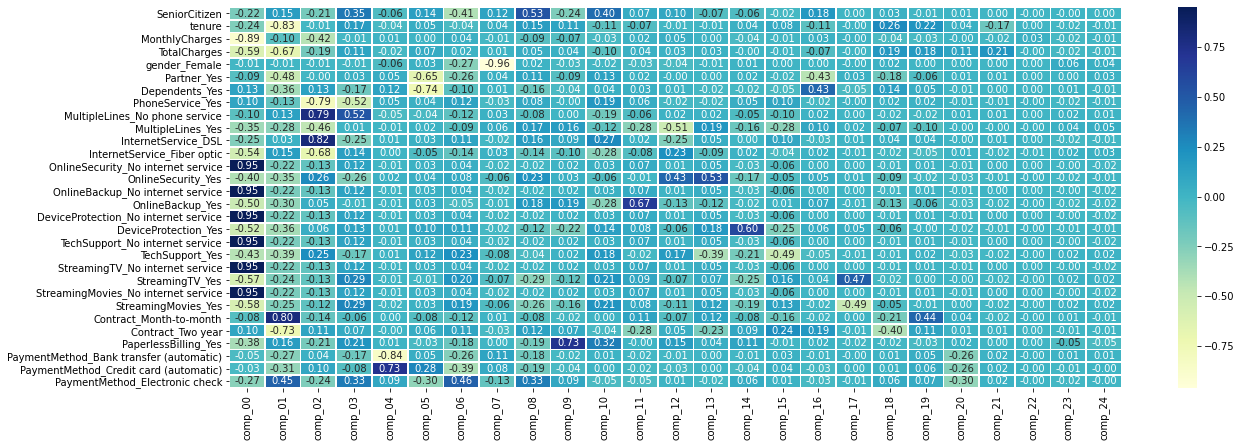

In [21]:
# Combine the X varaibles and new principal components
combined_df = pd.concat([X, components_df], axis=1)

# Create a correlation matrix of all X variables and principal components
correlation = combined_df.corr()

# Creat a matrix showing the correlation between:
# Features vs Principal Components
# Remove the parts of the output to keep the correlation between features and principal components
# Keep Rows up till components: correlation[:-len(components_df.columns)]
# Keep Columns starting with compenents: .loc[:, 'comp_00':]
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

# Plot Features vs Principal Components correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

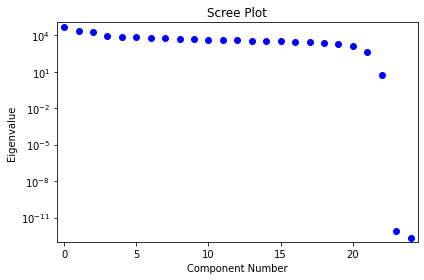

In [22]:
# Create a Scree Plot
pca.plot_scree()
plt.show()

In [23]:
############################## RANDOM FOREST MODEL ############################

In [24]:
#Resize components based on the scree plot elbow rule
X = components_df.iloc[:,:20]


In [25]:
# Divide data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Fit a model and print training and testing scores
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9984406326576075
Testing Score: 0.7762191048764195


In [28]:
# Calculate feature importance from the fitted random forest model
features = clf.feature_importances_
print(features)

[0.0654415  0.16698196 0.08949814 0.04173513 0.0407124  0.04336111
 0.03802376 0.03550033 0.04316762 0.03568772 0.03709501 0.0423426
 0.03759342 0.03973228 0.03634193 0.03897463 0.03592952 0.03378346
 0.04743232 0.05066516]


In [29]:
# Visualize the feature importance 
px.bar(x=X.columns, y=features,labels={"x":"Features","y":"Score Features"})

In [30]:
y_pred = clf.predict(X_test)

In [31]:
# Score the model with the testing dataset
print(f'Accuracy: {clf.score(X_test, y_test)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Correctly Classified: {accuracy_score(y_test, y_pred, normalize=False)}')
print(f'Total Test Records: {len(y_test)}')

Accuracy: 0.7321309285237141
Accuracy: 0.7321309285237141
Correctly Classified: 1096
Total Test Records: 1497


In [32]:
# Create a basic Confusion Matrix without the need of a DataFrame or calculations
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1096    0]
 [ 401    0]]


In [33]:
# Unpack the Confusion Matrix into variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 1096
False Positive: 0
False Negative: 401
True Positive: 0


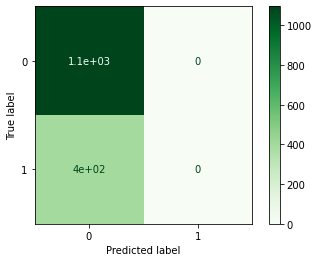

In [34]:
# Plot the Confusion Matrix true label prediction percentages
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Greens)

In [ ]:
########################### LOGISTIC REGRESSION MODEL ###############################

In [35]:
#Resize components based on the scree plot elbow rule
X = components_df.iloc[:,:20]

In [36]:
# Divide data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Logistic Regression Time
# We set the solver to the most commonly used 'liblinear' to avoid unesscessary warnings 
model = LogisticRegression(solver='liblinear')

In [39]:
 # Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Print training and testing scores
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9984406326576075
Testing Score: 0.7762191048764195


In [41]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

In [42]:
# Score the model with the testing dataset
print(f'Accuracy: {model.score(X_test, y_test)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Correctly Classified: {accuracy_score(y_test, y_pred, normalize=False)}')
print(f'Total Test Records: {len(y_test)}')

Accuracy: 0.7321309285237141
Accuracy: 0.7321309285237141
Correctly Classified: 1096
Total Test Records: 1497


In [43]:
# Basic Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1096    0]
 [ 401    0]]


In [44]:
# Unpack the Confusion Matrix into variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 1096
False Positive: 0
False Negative: 401
True Positive: 0


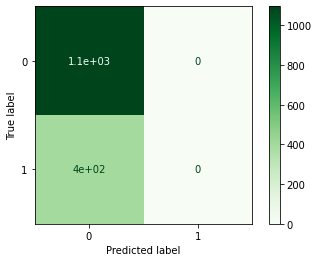

In [45]:
# Plot the Confusion Matrix true label prediction percentages
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Greens)

In [46]:
#################### K NEAREST NEIGHBOR ALGORITHM MODEL ########################

In [47]:
#Resize components based on the scree plot elbow rule
X = components_df.iloc[:,:20]

In [48]:
# Divide data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [49]:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
# Print training and testing scores
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9984406326576075
Testing Score: 0.7762191048764195


In [54]:
# Make predictions using the testing dataset
knn_y_pred = knn.predict(X_test)

In [49]:
# Score the model with the testing dataset
print(f'Accuracy: {knn.score(X_test, y_test)}')
print(f'Accuracy: {accuracy_score(y_test, knn_y_pred)}')
print(f'Correctly Classified: {accuracy_score(y_test, knn_y_pred, normalize=False)}')
print(f'Total Test Records: {len(y_test)}')

Accuracy: 0.7481629926519706
Accuracy: 0.7481629926519706
Correctly Classified: 1120
Total Test Records: 1497


In [55]:
cm = confusion_matrix(y_test, knn_y_pred)
print(cm)

[[911 185]
 [192 209]]


In [56]:
# Unpack the Confusion Matrix into variables
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 911
False Positive: 185
False Negative: 192
True Positive: 209


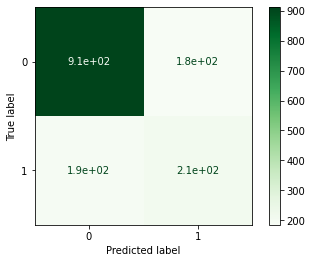

In [57]:
# Plot the Confusion Matrix true label prediction percentages
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Greens)